In [1]:
import models
from models import combine_bench_prior, load_priorband_data,add_rel_ranks,rename_algos,create_incumbent, model, create_cd_cluster
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";time="used_fidelity"
algos=["pb_mutation_dynamic_geometric-default-at-target","random_search","hyperband"]
fs=[24]
f_space=np.linspace(1,max(fs),max(fs)).tolist()
benchmarks=["jahs_cifar10","jahs_colorectal_histology","jahs_fashion_mnist","lcbench-126026","lcbench-167190","lcbench-168330","lcbench-168910","lcbench-189906","cifar100_wideresnet_2048","imagenet_resnet_512","lm1b_transformer_2048","translatewmt_xformer_64"]
label_dict={'random_search': 'RS', 'hyperband': 'HB', 'pb_mutation_dynamic_geometric-default-at-target': 'PB', 'jahs_cifar10': 'JAHS-C10', 'jahs_colorectal_histology': 'JAHS-CH', 'jahs_fashion_mnist': 'JAHS-FM', 'lcbench-126026': 'LC-126026', 'lcbench-167190': 'LC-167190', 'lcbench-168330': 'LC-168330', 'lcbench-168910': 'LC-168910', 'lcbench-189906': 'LC-189906', 'cifar100_wideresnet_2048': 'PD1-Cifar100', 'imagenet_resnet_512': 'PD1-ImageNet', 'lm1b_transformer_2048': 'PD1-LM1B', 'translatewmt_xformer_64': 'PD1-WMT',"random_search_prior":"RS+Prior","bo":"BO","pibo":"PiBO","bohb":"BOHB","priorband_bo":"PriorBand+BO"}

data=pd.read_parquet("priorband_benchPrior_relRanks_f24_meta.parquet")

In [2]:
loss="value"

m0_bar=model(formula=f"{loss}~{algorithm}",data=data)
m0=model(formula=f"{loss}~{algorithm}+(1|{benchmark})",data=data)
m1=model(formula=f"{loss}~{algorithm}+{benchmark}",data=data)

# print("Task 1️⃣")
# models.glrt(m1,m0_bar,names=["M₁","M₀'"])
# print("=> Benchmarks are important in determining algorithms behaviour \n")
# print("Task 2️⃣")
# models.glrt(m1,m0,names=["M₁","M₀"])
# print("=> And they should be a fixed factor")


boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 



P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


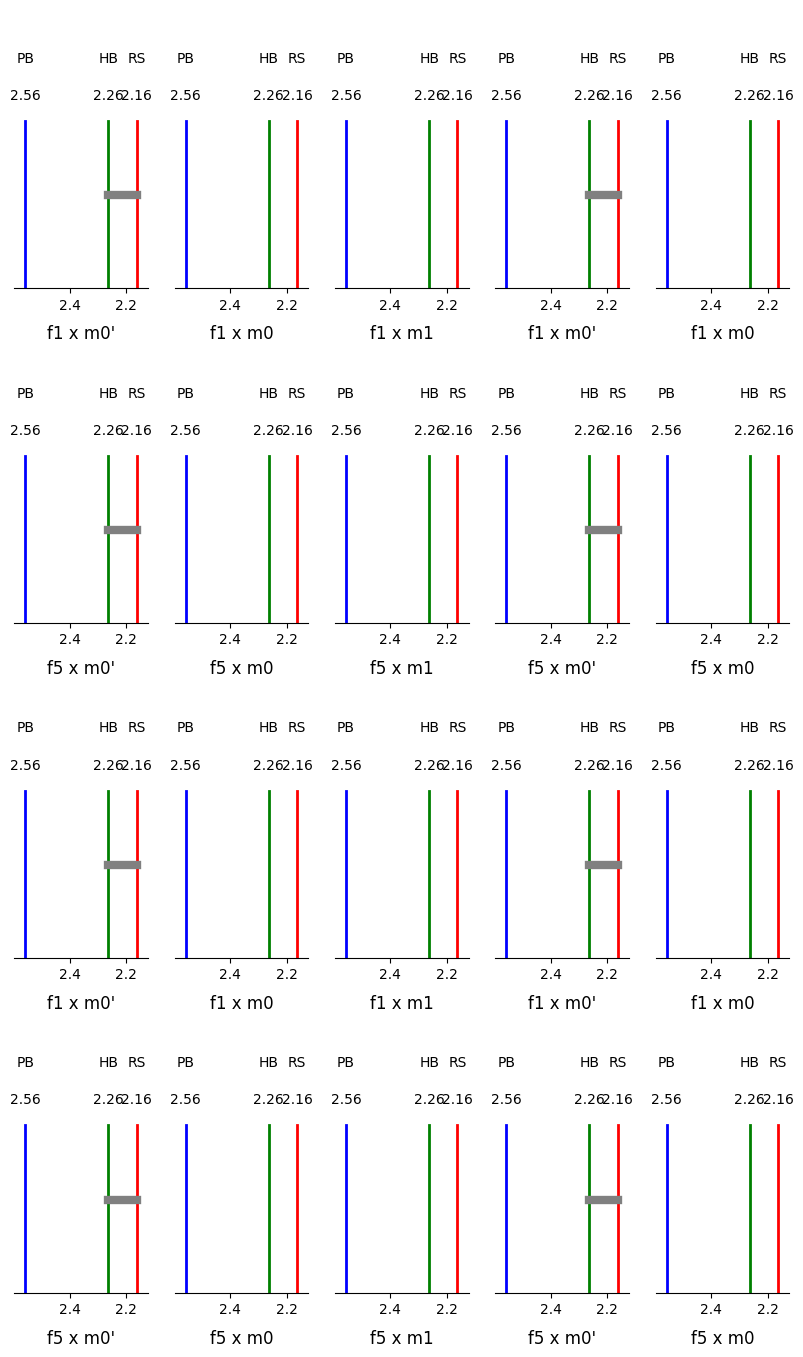

In [6]:

result_list=[]
result_list.append(m0_bar.post_hoc(marginal_vars=algorithm))
result_list.append(m0.post_hoc(marginal_vars=algorithm))
result_list.append(m1.post_hoc(marginal_vars=algorithm))
result_list.append(m0_bar.post_hoc(marginal_vars=algorithm))
result_list.append(m0.post_hoc(marginal_vars=algorithm))
# print(result_list)
create_cd_cluster([result_list,result_list,result_list,result_list],["f1","f5","f1","f5"],["m0'","m0","m1","m0'","m0"])